# Effect of the sample size in cross-validation

In the previous notebook, we presented the general cross-validation framework
and how to assess if a predictive model is underfiting, overfitting, or
generalizing. Besides these aspects, it is also important to understand how
the different errors are influenced by the number of samples available.

In this notebook, we will show this aspect by looking a the variability of
the different errors.

Let's first load the data and create the same model as in the previous
notebook.

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescale the target in k$

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [2]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

## Learning curve

To understand the impact of the number of samples available for training on
the statistical performance of a predictive model, it is possible to
synthetically reduce the number of samples used to train the predictive model
and check the training and testing errors.

Therefore, we can vary the number of samples in the training set and repeat
the experiment. The training and testing scores can be plotted similarly to
the validation curve, but instead of varying a hyperparameter, we vary the
number of training samples. This curve is called the **learning curve**.

It gives information regarding the benefit of adding new training samples
to improve a model's statistical performance.

Let's compute the learning curve for a decision tree and vary the
proportion of the training set from 10% to 100%.

In [3]:
import numpy as np
train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

We will use a `ShuffleSplit` cross-validation to assess our predictive model.

In [4]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)

Now, we are all set to carry out the experiment.

In [5]:
from sklearn.model_selection import learning_curve

results = learning_curve(
    regressor, data, target, train_sizes=train_sizes, cv=cv,
    scoring="neg_mean_absolute_error", n_jobs=2)
train_size, train_scores, test_scores = results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

Now, we can plot the curve.

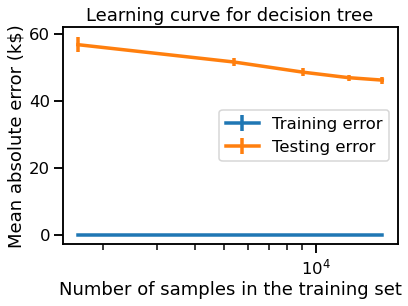

In [6]:
import matplotlib.pyplot as plt

plt.errorbar(train_size, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training error")
plt.errorbar(train_size, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Testing error")
plt.legend()

plt.xscale("log")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Learning curve for decision tree")

Looking at the training error alone, we see that we get an error of 0 k$. It
means that the trained model (i.e. decision tree) is clearly overfitting the
training data.

Looking at the testing error alone, we observe that the more samples are
added into the training set, the lower the testing error becomes. Also, we
are searching for the plateau of the testing error for which there is no
benefit to adding samples anymore or assessing the potential gain of adding
more samples into the training set.

If we achieve a plateau and adding new samples in the training set does not
reduce the testing error, we might have reach the Bayes error rate using the
available model. Using a more complex model might be the only possibility to
reduce the testing error further.

## Summary

In the notebook, we learnt:

* the influence of the number of samples in a dataset, especially on the
  variability of the errors reported when running the cross-validation;
* about the learning curve that is a visual representation of the capacity
  of a model to improve by adding new samples.